In [36]:
import os
import sys
import copy
import pandas as pd
import seaborn as sns
import pylab as pl

import importlib

In [10]:
# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

util.set_sns_style(style='dark')
%matplotlib notebook

# 3 examples of different MFC regimes

In [12]:
fn1 =  '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw/09142020-154113_Fly2_fed_lights_003.log'
d1 = pd.read_csv(fn1)

<IPython.core.display.Javascript object>


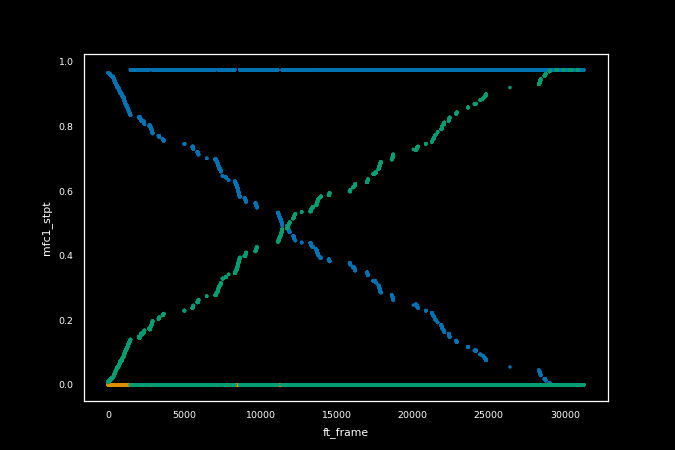

In [13]:
mfc_vars = [v for v in d1.columns if 'mfc' in v]
mfc_cols = sns.color_palette('colorblind', n_colors=len(mfc_vars))

fig, ax = pl.subplots()
for m, c in zip(mfc_vars, mfc_cols):
    sns.scatterplot(data=d1, ax=ax, x='ft_frame', y=m, c=c, edgecolor='none', s=5)

<IPython.core.display.Javascript object>


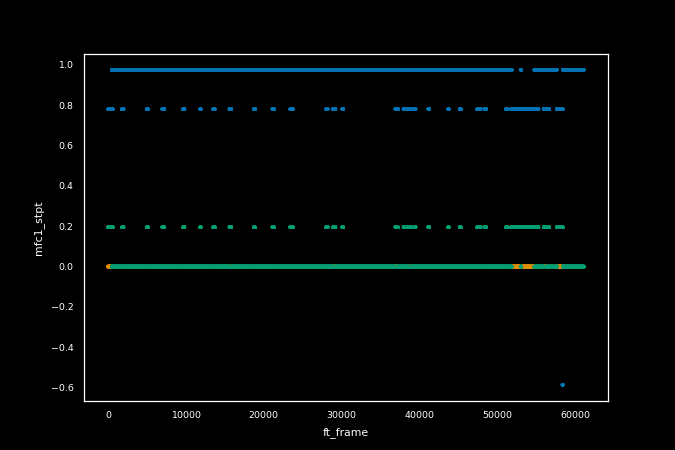

In [16]:
fn2 = '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/gradient_vs_constant-odor/constant_odor/10272020-155449_constantOdor1_Fly1.log'
d2 = pd.read_csv(fn2)

# plot
mfc_vars = [v for v in d2.columns if 'mfc' in v]
mfc_cols = sns.color_palette('colorblind', n_colors=len(mfc_vars))

fig, ax = pl.subplots()
for m, c in zip(mfc_vars, mfc_cols):
    sns.scatterplot(data=d2, ax=ax, x='ft_frame', y=m, c=c, edgecolor='none', s=5)

<IPython.core.display.Javascript object>


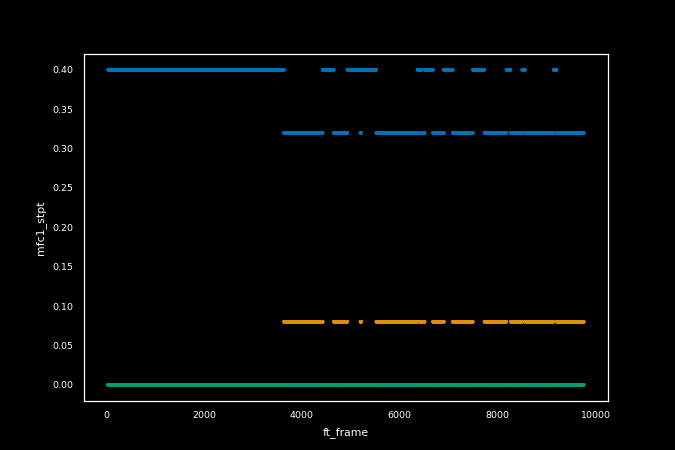

In [18]:
# from ./Analysis/0-degree (average bout data, Andy)
fn3 = '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Analysis/0-degree/logs/06022022-133201_CantonS_constantOdor_Fly1.log'

d3 = pd.read_csv(fn3)
d3.head()

# plot
mfc_vars = [v for v in d3.columns if 'mfc' in v]
mfc_cols = sns.color_palette('colorblind', n_colors=len(mfc_vars))

fig, ax = pl.subplots()
for m, c in zip(mfc_vars, mfc_cols):
    sns.scatterplot(data=d3, ax=ax, x='ft_frame', y=m, c=c, edgecolor='none', s=5)

<IPython.core.display.Javascript object>


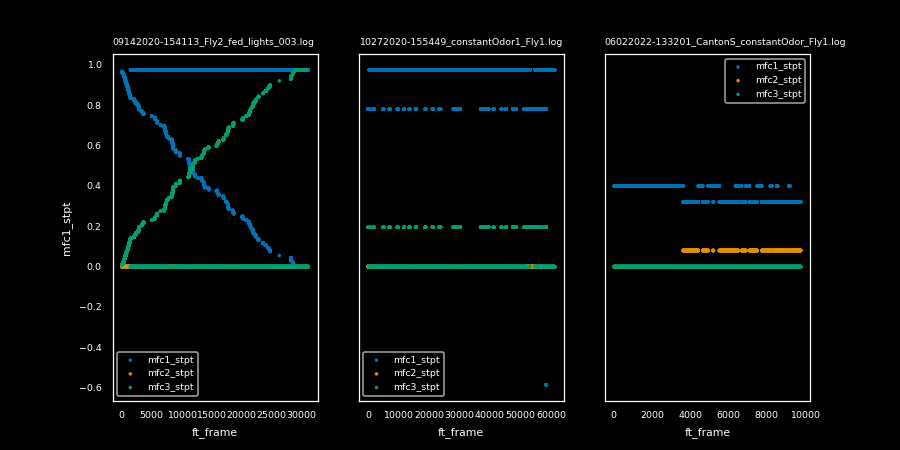

In [94]:


fig, axn = pl.subplots(1, 3, sharey=True, figsize=(8,4))

for ax, d_, f_ in zip(axn.flat, [d1, d2, d3], [fn1, fn2, fn3]):
    for m, c in zip(mfc_vars, mfc_cols):
        sns.scatterplot(data=d_, ax=ax, x='ft_frame', y=m, c=c, edgecolor='none', s=5, label=m)
    ax.set_title(os.path.split(f_)[-1], loc='left', fontsize=6)


## get MFC params

In [31]:
odor_mfc = [c for c in d2.columns if 'mfc' in c and c!='mfc1_stpt' and d2[c].unique().max()>0][0]
odor_mfc

'mfc3_stpt'

In [33]:
d2[d2[odor_mfc]!=0][odor_mfc].max() - d2[d2[odor_mfc]!=0][odor_mfc].min()


0.0

In [34]:

odor_mfc = [c for c in d1.columns if 'mfc' in c and c!='mfc1_stpt' and d1[c].unique().max()>0][0]
d1[d1[odor_mfc]!=0][odor_mfc].max() - d1[d1[odor_mfc]!=0][odor_mfc].min()
 [c for c in d1.columns if 'mfc' in c and c!='mfc1_stpt' and d1[c].unique().max()>0][0]

0.966730620184793

In [48]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [50]:
d1_odor = butil.get_odor_mfc(d1)
d1_min, d1_max = butil.get_odor_range(d1, mfc=d1_odor)
print(d1_odor, d1_min, d1_max)

mfc3_stpt 0.0092453557911829 0.975975975975976


In [51]:
d2_odor = butil.get_odor_mfc(d2)
d2_min, d2_max = butil.get_odor_range(d2, mfc=d2_odor)
print(d2_odor, d2_min, d2_max)

mfc3_stpt 0.1951951951951952 0.1951951951951952


In [53]:
d3_odor = butil.get_odor_mfc(d3)
d3_min, d3_max = butil.get_odor_range(d3, mfc=d3_odor)
print(d3_odor, d3_min, d3_max)

mfc2_stpt 0.08 0.08


## check odor percent, etc.

In [96]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [92]:
mfc_dict = butil.get_mfc_params(d3)
mfc_dict

{'air_mfc': 'mfc1_stpt',
 'air_min': 0.32,
 'air_max': 0.4,
 'odor_mfc': 'mfc2_stpt',
 'odor_mfc_min': 0.08,
 'odor_mfc_max': 0.08,
 'percent_odor': 0.2}

In [93]:
mfc_dict['odor_mfc_max']/mfc_dict['air_max']


0.19999999999999998